## Handle Imbalanced Datasets

Handling an imbalanced dataset in Python involves applying techniques to ensure that your machine learning model performs well despite the disproportionate class distribution. 

### Read data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merged.csv', index_col=False)

In [3]:
df

,Tweet,Sarcasm
0,Fantastic service yet again from EE. 1st you u...,yes
1,Not sure if that was or. I will take it! face_...,yes
2,Barely 9 am and already shaking with rage.,yes
3,I guess that proves it then. Black folks have ...,yes
4,Does this tweet need a tag,yes
...,...,...
2976,Sometimes truth is glaring you in the face bl...,no
2977,I just love not hanging out with my boyfriend .,no
2978,There is this 1 quince picture I have that I'm...,no
2979,I feel so ill at the moment that I cant speak ...,no


In [4]:
y = df['Sarcasm']
y.value_counts()

Sarcasm
yes    1687
no     1294
Name: count, dtype: int64

<Axes: ylabel='count'>

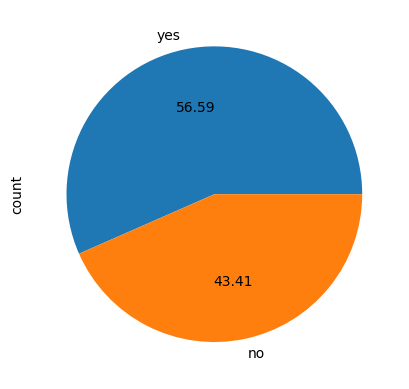

In [5]:
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x2740bb552e0>,
 [Text(-0.226169841734911, 1.0764976556823547, 'yes'),
  Text(0.2261698417349104, -1.076497655682355, 'no')],
 [Text(-0.12336536821904236, 0.5871805394631026, '56.59'),
  Text(0.12336536821904202, -0.5871805394631026, '43.41')])

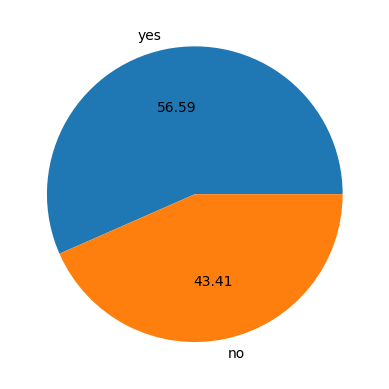

In [6]:
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=y.value_counts().index)

### 1) Random Undersampling
This involves reducing the number of instances in the majority class.

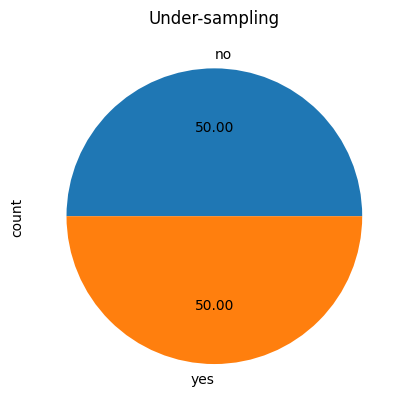

In [7]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X = df['Tweet'].values.reshape(-1, 1) 
y = df['Sarcasm']

# Apply RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) 
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [8]:
y = df['Sarcasm']
y_res.value_counts()

Sarcasm
no     1294
yes    1294
Name: count, dtype: int64

## 2) Random Oversampling
This involves increasing the number of instances in the minority class.

SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic samples for the minority class.

In [9]:
y_res.value_counts()

Sarcasm
no     1294
yes    1294
Name: count, dtype: int64

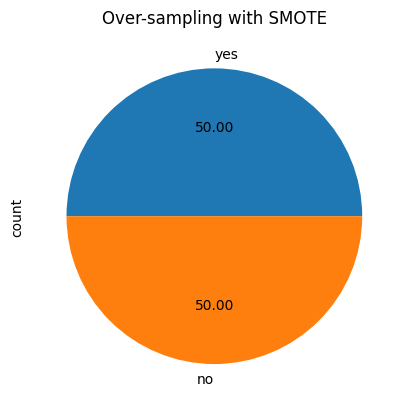

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['Tweet'])  
y = df['Sarcasm'] 
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling with SMOTE")
plt.show()

In [11]:
y_resampled.value_counts()

Sarcasm
yes    1687
no     1687
Name: count, dtype: int64

## 3) Using Ensemble Techniques

### a) Balanced Random Forest:

This techniques is simple and effective in creating balanced datasets, they do not account for the underlying structure of the data and can potentially lead to loss of important information (in the case of undersampling) or overfitting (in the case of oversampling).

The BalancedRandomForestClassifier is an extension of the traditional random forest classifier designed to handle imbalanced datasets more effectively.

While simple undersampling and oversampling can balance the dataset, the BalancedRandomForestClassifier provides a more sophisticated approach that maintains the diversity and robustness of the random forest while addressing class imbalance in each tree's training data. This typically results in better performance on imbalanced datasets compared to simply balancing the dataset before training a traditional classifier.

Example Scenario
Consider a scenario where you have a dataset with 1000 samples of class A and 100 samples of class B

1) Random Undersampling:
Reduces the number of class A samples to 100, matching the number of class B samples. This can lead to loss of important information from class A.
Random Oversampling:

2) Random Oversampling: 
Increases the number of class B samples to 1000 by duplicating or generating synthetic samples. This can lead to overfitting.
BalancedRandomForestClassifier:

3) BalancedRandomForestClassifier:
For each tree in the forest, it ensures that the bootstrap sample is balanced (e.g., 100 samples of class A and 100 samples of class B), leading to a more robust model that can generalize better on imbalanced data.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


              precision    recall  f1-score   support

          no       0.80      0.69      0.74       250
         yes       0.80      0.88      0.84       347

    accuracy                           0.80       597
   macro avg       0.80      0.78      0.79       597
weighted avg       0.80      0.80      0.80       597

Top 20 important features:
am: 0.004915105670024825
it: 0.0049226222300866665
of: 0.0056664076997096
and: 0.005789611285158124
that: 0.005809919086250847
me: 0.005839895824379252
my: 0.006051019848200287
in: 0.006316214439456468
for: 0.006408333907861077
but: 0.006489140176861276
don: 0.00702783120603043
just: 0.007837723370915288
is: 0.008457191890732983
this: 0.008738571558624376
you: 0.009139293089077086
the: 0.010323340364297884
to: 0.023481273256369933
love: 0.02717862791512547
so: 0.054008951313375846
speak: 0.0806973301612709


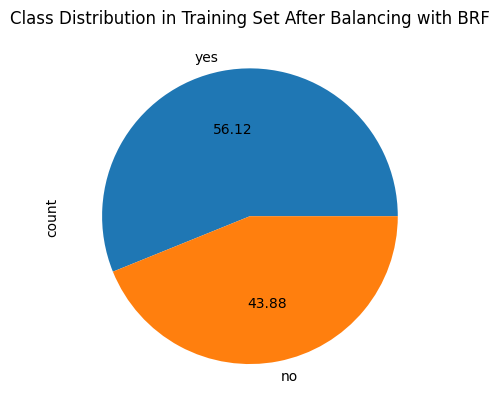

In [12]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report

X = df['Tweet']
y = df['Sarcasm']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply BalancedRandomForestClassifier with explicit sampling_strategy
brf = BalancedRandomForestClassifier(sampling_strategy='auto', random_state=42)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
print(classification_report(y_test, y_pred))

# Display the feature importances
importances = brf.feature_importances_
feature_names = tfidf.get_feature_names_out()
top_n = 20
top_indices = importances.argsort()[-top_n:]

print("Top 20 important features:")
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]}")
    
y_train_resampled = brf.predict(X_train)
y_train_resampled = pd.Series(y_train_resampled, name='Sarcasm')
ax = y_train_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Class Distribution in Training Set After Balancing with BRF")
plt.show()

In [13]:
y_train_resampled.value_counts()

Sarcasm
yes    1338
no     1046
Name: count, dtype: int64

### b) Easy Ensemble

The Easy Ensemble technique is a specific approach within ensemble learning that addresses the drawbacks of simple random oversampling by using a more sophisticated method to create multiple balanced subsamples.

##### Here’s how it works:

Bagging Approach: Easy Ensemble follows a bagging (bootstrap aggregating) approach where it creates multiple subsets of the training data by random sampling with replacement.

Balanced Sampling: Each subset (or base learner) is constructed to have a balanced class distribution by sampling both classes in equal proportions or based on a specified sampling strategy.

Aggregation: Multiple base learners are trained on these balanced subsets independently, and their predictions are aggregated (e.g., averaging for regression, voting for classification) to make the final prediction.

##### Advantages of Easy Ensemble:

Preservation of Information: Unlike random undersampling, Easy Ensemble does not discard majority class samples but rather balances the data in a way that preserves both classes' information.

Reduction of Overfitting: By creating balanced subsamples, Easy Ensemble reduces the risk of overfitting that is common with simple random oversampling.

Improved Generalization: By training multiple models on different balanced subsets, Easy Ensemble can capture different aspects of the data distribution, leading to improved generalization on unseen data.

              precision    recall  f1-score   support

          no       0.96      0.52      0.68       250
         yes       0.74      0.99      0.85       347

    accuracy                           0.79       597
   macro avg       0.85      0.75      0.76       597
weighted avg       0.83      0.79      0.78       597



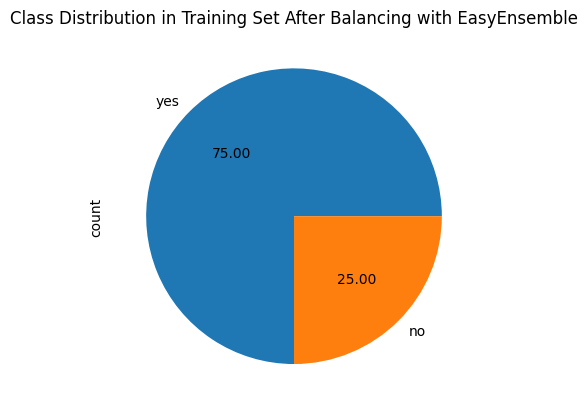

Sarcasm
yes    1788
no      596
Name: count, dtype: int64

In [14]:
from imblearn.ensemble import EasyEnsembleClassifier

X = df['Tweet']
y = df['Sarcasm']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply EasyEnsembleClassifier with explicit sampling_strategy
eec = EasyEnsembleClassifier(sampling_strategy='auto', random_state=42)
eec.fit(X_train, y_train)

y_pred = eec.predict(X_test)
print(classification_report(y_test, y_pred))

y_train_resampled = eec.predict(X_train)
y_train_resampled = pd.Series(y_train_resampled, name='Sarcasm')
ax = y_train_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Class Distribution in Training Set After Balancing with EasyEnsemble")
plt.show()
y_train_resampled.value_counts()

## 4) BalancedBaggingClassifier
When dealing with imbalanced datasets, traditional classifiers tend to favor the majority class, neglecting the minority class due to its lower representation. The BalancedBaggingClassifier, an extension of sklearn classifiers, addresses this imbalance by incorporating additional balancing during training.

Accuracy: 0.8090452261306532
Classification Report:
               precision    recall  f1-score   support

          no       0.85      0.66      0.74       250
         yes       0.79      0.91      0.85       347

    accuracy                           0.81       597
   macro avg       0.82      0.79      0.80       597
weighted avg       0.81      0.81      0.80       597



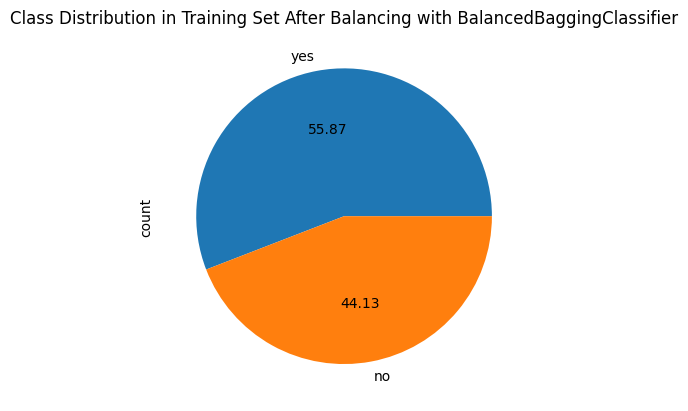


Value counts after balancing:
Sarcasm
yes    1332
no     1052
Name: count, dtype: int64


In [16]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier

X = df['Tweet']
y = df['Sarcasm']

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

base_classifier = RandomForestClassifier(random_state=42)

# Initialize the BalancedBaggingClassifier
balanced_bagging_classifier = BalancedBaggingClassifier(estimator=base_classifier,
                                                        sampling_strategy='auto',
                                                        replacement=False,
                                                        random_state=42)
balanced_bagging_classifier.fit(X_train, y_train)

y_pred = balanced_bagging_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

y_train_resampled = balanced_bagging_classifier.predict(X_train)
y_train_resampled = pd.Series(y_train_resampled, name='Sarcasm')
ax = y_train_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Class Distribution in Training Set After Balancing with BalancedBaggingClassifier")
plt.show()

print("\nValue counts after balancing:")
print(y_train_resampled.value_counts())


## 5) Identify right evaluation matrix
The accuracy of a classifier is the total number of correct predictions divided by the total number of predictions. This may be good enough for a well-balanced class but not ideal for an imbalanced class problem.



### a) Confusion Matrix:

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X = df['Tweet']
y = df['Sarcasm']
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[245 141]
 [ 40 469]]


### b) Precision, Recall, F1-score:

In [18]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.86      0.63      0.73       386
         yes       0.77      0.92      0.84       509

    accuracy                           0.80       895
   macro avg       0.81      0.78      0.78       895
weighted avg       0.81      0.80      0.79       895



### c) ROC-AUC(Receiver Operating Characteristic - Area Under Curve):

In [19]:
# ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.8658626586723943


### 4) Precision-Recall Curve and AUC

In [20]:
# Precision-Recall AUC
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label='yes')
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Precision-Recall AUC: 0.8731669500830495


### 5) Matthews Correlation Coefficient (MCC)

In [21]:
# Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {mcc}")

MCC: 0.5912091937793609


### 6) Specificity (True Negative Rate)

In [22]:
# Specificity
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

Specificity: 0.6347150259067358
